# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from itertools import combinations
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [16]:
# set up lists to hold reponse info
lat = []
lon=[]
temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
city_list = []

#count records and set numbers
record_num = 0
set_num = 1

In [17]:
print('''
Beginning Data Retrieval     
-----------------------------
''')   

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if record_num ==50:
            set_num += 1
            record_num = 1 
            city_list.append(city)
        
        else:
            record_num += 1 
            city_list.append(city)
        print(f"Processing Record {record_num} of Set {set_num} | {city} ")
    
    except (KeyError,IndexError):
        print ("City not found. Skipping...")
        
print('''
Data Retrieval Complete    
-----------------------------
''')  
    


Beginning Data Retrieval     
-----------------------------

City not found. Skipping...
Processing Record 1 of Set 1 | fundao 
Processing Record 2 of Set 1 | acari 
Processing Record 3 of Set 1 | severo-kurilsk 
Processing Record 4 of Set 1 | mayo 
Processing Record 5 of Set 1 | mataura 
Processing Record 6 of Set 1 | thompson 
Processing Record 7 of Set 1 | aswan 
Processing Record 8 of Set 1 | nelson bay 
City not found. Skipping...
Processing Record 9 of Set 1 | amapa 
City not found. Skipping...
Processing Record 10 of Set 1 | latung 
Processing Record 11 of Set 1 | butaritari 
Processing Record 12 of Set 1 | ushuaia 
Processing Record 13 of Set 1 | guadalajara 
Processing Record 14 of Set 1 | pitangueiras 
Processing Record 15 of Set 1 | bredasdorp 
Processing Record 16 of Set 1 | tuktoyaktuk 
Processing Record 17 of Set 1 | clyde river 
Processing Record 18 of Set 1 | albany 
Processing Record 19 of Set 1 | jimenez 
Processing Record 20 of Set 1 | bluff 
Processing Record 21 of

Processing Record 31 of Set 4 | donegal 
Processing Record 32 of Set 4 | mareeba 
Processing Record 33 of Set 4 | angren 
Processing Record 34 of Set 4 | mount pleasant 
Processing Record 35 of Set 4 | haapiti 
Processing Record 36 of Set 4 | balikpapan 
Processing Record 37 of Set 4 | sao filipe 
Processing Record 38 of Set 4 | vostok 
Processing Record 39 of Set 4 | saint-philippe 
Processing Record 40 of Set 4 | katobu 
City not found. Skipping...
Processing Record 41 of Set 4 | tinskoy 
Processing Record 42 of Set 4 | trairi 
Processing Record 43 of Set 4 | chokwe 
Processing Record 44 of Set 4 | kingsport 
Processing Record 45 of Set 4 | umred 
Processing Record 46 of Set 4 | lavrentiya 
Processing Record 47 of Set 4 | bandar-e lengeh 
Processing Record 48 of Set 4 | kutum 
Processing Record 49 of Set 4 | shimoda 
Processing Record 50 of Set 4 | san patricio 
Processing Record 1 of Set 5 | dauphin 
Processing Record 2 of Set 5 | sur 
Processing Record 3 of Set 5 | dwarka 
Processi

Processing Record 18 of Set 8 | beloha 
Processing Record 19 of Set 8 | gurupi 
Processing Record 20 of Set 8 | joshimath 
Processing Record 21 of Set 8 | morden 
Processing Record 22 of Set 8 | biak 
Processing Record 23 of Set 8 | sorland 
Processing Record 24 of Set 8 | aksarka 
Processing Record 25 of Set 8 | narsaq 
Processing Record 26 of Set 8 | samsun 
Processing Record 27 of Set 8 | deputatskiy 
Processing Record 28 of Set 8 | chippewa falls 
Processing Record 29 of Set 8 | tura 
Processing Record 30 of Set 8 | whitehorse 
Processing Record 31 of Set 8 | saint anthony 
Processing Record 32 of Set 8 | lamu 
Processing Record 33 of Set 8 | port hardy 
Processing Record 34 of Set 8 | abaza 
Processing Record 35 of Set 8 | hervey bay 
Processing Record 36 of Set 8 | morondava 
Processing Record 37 of Set 8 | aitape 
Processing Record 38 of Set 8 | koumac 
Processing Record 39 of Set 8 | garissa 
Processing Record 40 of Set 8 | dalbandin 
Processing Record 41 of Set 8 | caloundra 


Processing Record 6 of Set 12 | mantua 
Processing Record 7 of Set 12 | antalaha 
Processing Record 8 of Set 12 | maiduguri 
Processing Record 9 of Set 12 | aberdeen 
Processing Record 10 of Set 12 | taiobeiras 
Processing Record 11 of Set 12 | kuytun 
Processing Record 12 of Set 12 | mackenzie 
Processing Record 13 of Set 12 | hokitika 
City not found. Skipping...
Processing Record 14 of Set 12 | micheweni 
Processing Record 15 of Set 12 | chiredzi 
Processing Record 16 of Set 12 | kropotkin 
City not found. Skipping...
Processing Record 17 of Set 12 | ayr 
Processing Record 18 of Set 12 | santa isabel do rio negro 
Processing Record 19 of Set 12 | flinders 
Processing Record 20 of Set 12 | yermakovskoye 
Processing Record 21 of Set 12 | luanda 
Processing Record 22 of Set 12 | batagay-alyta 
Processing Record 23 of Set 12 | coquimbo 
Processing Record 24 of Set 12 | polewali 
Processing Record 25 of Set 12 | mayahi 
Processing Record 26 of Set 12 | nhulunbuy 
Processing Record 27 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
#create dictionary to dreate data frame
city_dict = {
    "City": city_list,
    "Lat": lat, 
    "Lng": lon, 
    "Max Temp": temp, 
    "Humidity": humidity,
    "Cloudiness": clouds, 
    "Wind Speed": wind_speed, 
    "Country": country, 
    "Date": date }
    
#create data frame
city_dict= pd.DataFrame(city_dict)

In [19]:
#export the city data into a .csv.
city_dict.to_csv("cities.csv", index=False)

In [20]:
#print dataframe
city_df= pd.DataFrame(city_dict)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fundao,-19.9341,-40.4047,65.73,78,49,4.50,BR,1627691435
1,acari,-15.4311,-74.6158,64.54,73,92,3.42,PE,1627691435
2,severo-kurilsk,50.6789,156.1250,54.66,96,100,13.44,RU,1627691436
3,mayo,38.8876,-76.5119,84.78,55,1,1.99,US,1627691437
4,mataura,-46.1927,168.8643,49.48,98,100,1.16,NZ,1627691437
...,...,...,...,...,...,...,...,...,...
581,mogadishu,2.0371,45.3438,75.72,76,94,18.43,SO,1627691657
582,monticello,45.3055,-93.7941,77.95,62,1,4.61,US,1627691657
583,chute-aux-outardes,49.1168,-68.3990,58.98,100,90,3.44,CA,1627691658
584,ulaanbaatar,47.9077,106.8832,57.33,77,75,13.42,MN,1627691418


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

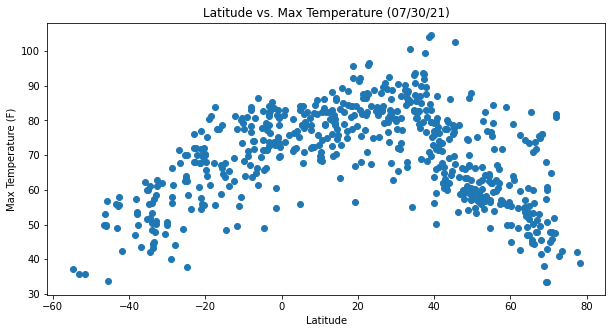

In [35]:
latitude = city_dict['Lat']
temperature = city_dict['Max Temp']

plt.figure(figsize=[10,5])

# Plot the lat vs the max temp
plt.scatter(x = latitude, y = temperature)

# Add labeling
# This extracts the date and returns it in the local time zone
# lat_time_plt = datetime.fromtimestamp(city_dict.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
# plt.xlim(-80,100)
# plt.ylim(min(temperature) - 10 , max(temperature) +10)
plt.show()

## Latitude vs. Humidity Plot

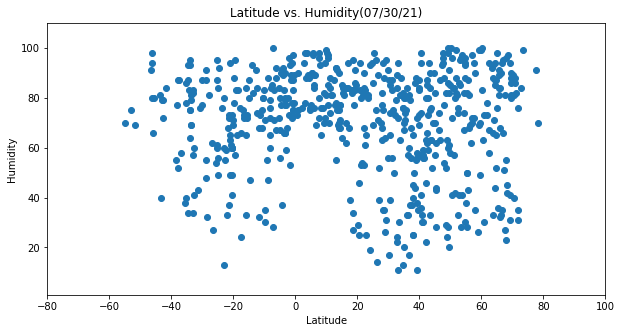

In [36]:

plt.figure(figsize=(10,5));

# Plot the lat vs humidity
plt.scatter(x = city_dict['Lat'], y = city_dict['Humidity']);

# Add labeling
# This extracts the date and returns it in the local time zone
plt.title(f"Latitude vs. Humidity({time.strftime('%x')})");
plt.xlabel("Latitude");
plt.ylabel("Humidity");

# Modify ticks
plt.xlim(-80,100);
plt.ylim(min(humidity) - 10 , max(humidity) +10);
plt.show()

## Latitude vs. Cloudiness Plot

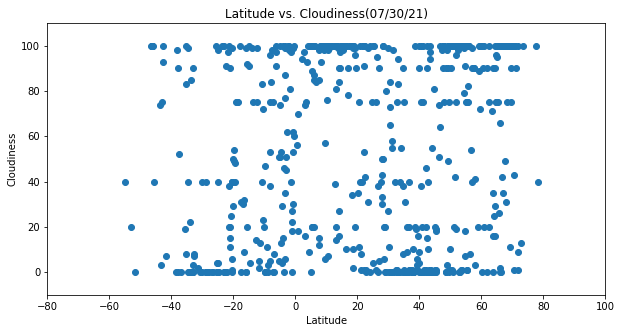

In [37]:
plt.figure(figsize=(10,5));

# Plot the lat vs Cloudiness
plt.scatter(x = city_dict['Lat'], y = city_dict['Cloudiness']);

# Add labeling
# This extracts the date and returns it in the local time zone

plt.title(f"Latitude vs. Cloudiness({time.strftime('%x')})");
plt.xlabel("Latitude");
plt.ylabel("Cloudiness");

# Modify ticks
plt.xlim(-80,100);
plt.ylim(min(clouds) - 10 , max(clouds) +10);
plt.show()

## Latitude vs. Wind Speed Plot

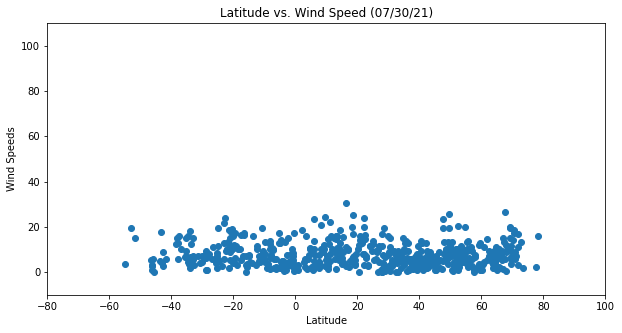

In [38]:
plt.figure(figsize=(10,5));

# Plot the lat vs Wind
plt.scatter(x = city_dict['Lat'], y = city_dict['Wind Speed']);

# Add labeling
plt.title(f"Latitude vs. Wind Speed ({time.strftime('%x')})");
plt.xlabel("Latitude");
plt.ylabel("Wind Speeds");

# Modify ticks
plt.xlim(-80,100);
plt.ylim(min(clouds) - 10 , max(clouds) +10);
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.0005203187901983633


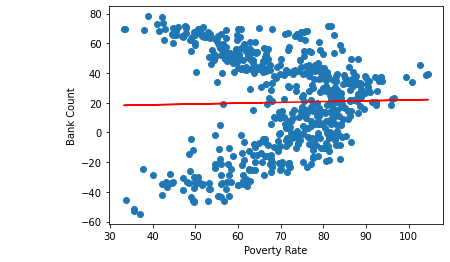

In [39]:
## Convert to floats and store x and y values
x_values = city_dict['Max Temp'].astype('float')
y_values = city_dict['Lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Poverty Rate')
plt.ylabel('Bank Count')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression